# <font color="blue">**Task 2: <ins>Prediction using Unsupervised ML</ins>**</font>
### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
### <font color="purple">**Author:**</font> **Rahul Noronha**

## Link to Data used in the Problem: [**Data**](https://bit.ly/3kXTdox)

### **<ins>Steps involved in K-Means Clustering</ins>:**
1. Data Collection.
1. Data Preparation.
  1. Clean Data.
  1. Visualize Data.
1. Find the optimum number of Clusters.
1. Use the K-Means Clustering to find the clusters of the Iris flowers.

## **Step 1: <ins>Data Collection</ins>**
We have obtained the data from the link shown above. The data was provided by The Sparks Foundation to be used for this particular task. The data is stored in a CSV file.

In [1]:
#Importing necessary libraries
import pandas as pd #For data processing.
import numpy as np #For data processing.
import sklearn #For Linear regression.
import seaborn as sns
from matplotlib import pyplot as plt #For visualization.
from sklearn.cluster import KMeans #For K-Means Clustering
from sklearn import metrics #To measure the performance of the model.
%matplotlib inline 
#To make the plots appear, and get stored within the Notebook Window.

In [2]:
#Store the data from the url using pandas
#I have downloaded and stored the Iris.csv file in the same folder as Task2.ipynb so there is no need of specifying file path.
data_frame = pd.read_csv('Iris.csv')

In [3]:
print(data_frame.to_markdown())

|     |   Id |   SepalLengthCm |   SepalWidthCm |   PetalLengthCm |   PetalWidthCm | Species         |
|----:|-----:|----------------:|---------------:|----------------:|---------------:|:----------------|
|   0 |    1 |             5.1 |            3.5 |             1.4 |            0.2 | Iris-setosa     |
|   1 |    2 |             4.9 |            3   |             1.4 |            0.2 | Iris-setosa     |
|   2 |    3 |             4.7 |            3.2 |             1.3 |            0.2 | Iris-setosa     |
|   3 |    4 |             4.6 |            3.1 |             1.5 |            0.2 | Iris-setosa     |
|   4 |    5 |             5   |            3.6 |             1.4 |            0.2 | Iris-setosa     |
|   5 |    6 |             5.4 |            3.9 |             1.7 |            0.4 | Iris-setosa     |
|   6 |    7 |             4.6 |            3.4 |             1.4 |            0.3 | Iris-setosa     |
|   7 |    8 |             5   |            3.4 |             1.5 |      

We notice there are 150 data items in the csv file and we proceed to Data preparation.

## **Step 2: <ins>Data Preparation</ins>**
The data needs to be prepared before it can be used to perform K-Means Clustering and this process has sub-steps.
  1. Clean Data
  1. Visualize Data

### **<ins>Clean Data</ins>**
We need to check if the data has any missing values, and if they do we need to deal with these missing values. If not we can proceed with the next step.

In [4]:
null_values = data_frame.isnull().sum()#isnull detect missing values and sum is used to find the total number of these missing values.
print(null_values)#Print the number of null values in the DataFrame.

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [5]:
#If the DataFrame has no Null values then we do not need to do any processing of Null values
if (null_values.SepalLengthCm==0 and null_values.SepalWidthCm==0 and null_values.PetalLengthCm==0 and null_values.PetalWidthCm==0 and null_values.Species==0):
  pass 
else:
  data_frame = data_frame.dropna(axis=0, how='any')#Drop any row (axis=0) which has one or more Null values (how= 'any').
  print(data_frame.to_markdown())#Print the data which has been formatted to not include anymore Null values and proceed to the further steps.

Since there are no null values found we proceed to the next step.

### **<ins>Visualize Data</ins>**

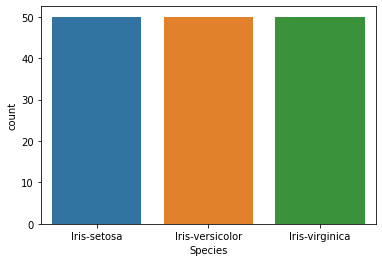

In [6]:
#Find the count of each number of species of Iris flower and represent it in a countplot
sns.countplot(x=data_frame['Species'])
plt.show()

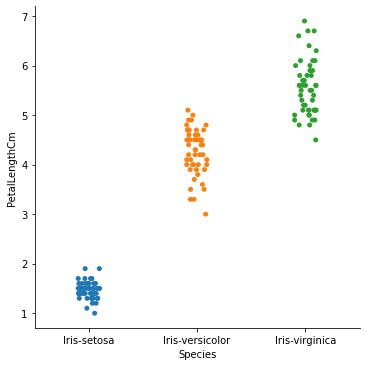

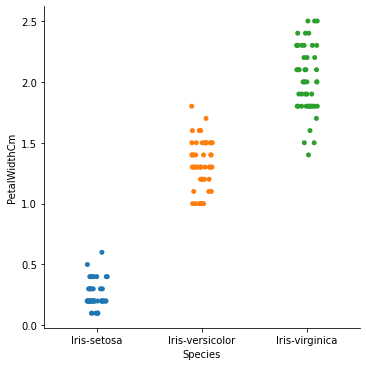

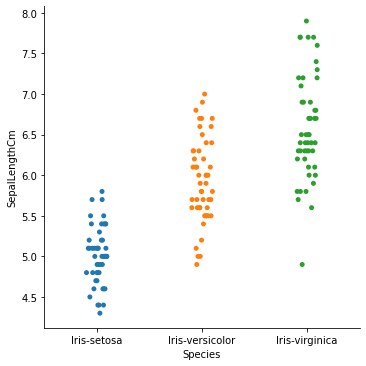

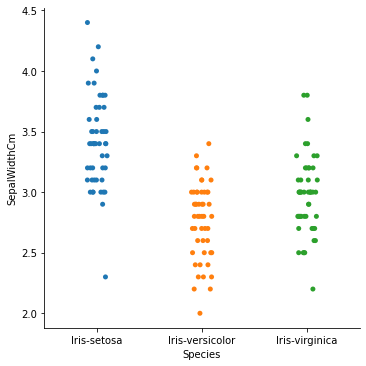

In [7]:
#Cateogorical Scatterplot shows us the frequencies of categorical data and we have observed it for all the parameters.
sns.catplot(x="Species", y="PetalLengthCm", data = data_frame)
sns.catplot(x="Species", y="PetalWidthCm", data = data_frame)
sns.catplot(x="Species", y="SepalLengthCm", data = data_frame)
sns.catplot(x="Species", y="SepalWidthCm", data = data_frame)
plt.show()

## **Step 3: <ins>Finding the Optimum Number of Clusters</ins>**

Let us find the number of clusters using the Elbow Method.

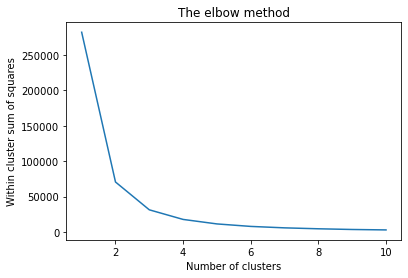

In [8]:
x = data_frame.iloc[:, [0, 1, 2, 3]].values

within_cluster_sum_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    within_cluster_sum_squares.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, allowing us to observe 'The elbow' which gives number of clusters.
plt.plot(range(1, 11), within_cluster_sum_squares)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within cluster sum of squares') # Within cluster sum of squares
plt.show()

We notice from the graph that we need 3 clusters as it the place where the Elbow originates, and this matches with the fact
that we have 3 different species of Iris flowers in the dataset as output labels.

Hence the **Optimum number of Clusters needed = 3** 

## **Step 4: <ins>Use the K-Means Clustering to find the clusters of the Iris flowers</ins>**

In [9]:
#Apply K-Means Clustering to the dataset and Visualize the clusters with their respective centroids
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

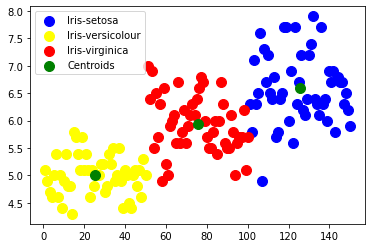

In [10]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'yellow', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'green', label = 'Centroids')

plt.legend()

plt.show()

**The task has been succesfully completed and the Species of Iris have been Clustered into k=3 by our Unsupersvised Learning Model using K-Means Clustering and the Visualizatin of the clusters with their centroids can be seen above.**